In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor,DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.feature_selection import RFE


In [2]:
df1=pd.read_csv('test.csv')
df2=pd.read_csv('train.csv')

In [3]:
df1

,age,sex,bmi,children,smoker,region,bloodpressure,diabetes,regular_ex
0,45,male,28.7,2,0,southwest,72,1,0
1,37,female,30.8,2,0,southeast,110,0,1
2,41,male,28.8,1,0,southwest,72,1,1
3,22,male,26.8,0,0,southeast,44,1,0
4,55,male,33.0,0,0,southeast,60,1,0
...,...,...,...,...,...,...,...,...,...
437,52,male,30.2,1,0,southwest,68,0,0
438,54,male,24.0,0,0,northeast,76,1,1
439,45,female,28.6,2,0,southeast,62,0,1
440,32,female,24.6,0,1,southwest,82,1,0


In [4]:
df2

,age,sex,bmi,children,smoker,region,bloodpressure,diabetes,regular_ex,claim
0,28,female,28.9,1,0,northeast,72,1,0,4337.74
1,49,female,21.3,1,0,southwest,94,0,0,9182.17
2,34,female,27.7,0,0,southeast,62,1,0,4415.16
3,57,female,20.1,1,0,southwest,72,0,1,12032.33
4,29,male,35.5,2,0,southwest,74,1,0,44585.46
...,...,...,...,...,...,...,...,...,...,...
891,30,male,25.5,0,0,northeast,60,1,0,3645.09
892,25,female,20.8,1,0,southwest,56,1,0,3208.79
893,19,male,35.5,0,0,northwest,74,0,0,1646.43
894,38,male,16.8,2,0,northeast,84,0,1,6640.54


In [5]:
df2.shape

(896, 10)

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 10 columns):
age              896 non-null int64
sex              896 non-null object
bmi              896 non-null float64
children         896 non-null int64
smoker           896 non-null int64
region           896 non-null object
bloodpressure    896 non-null int64
diabetes         896 non-null int64
regular_ex       896 non-null int64
claim            896 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 70.1+ KB


In [7]:
df2.isnull().sum()

age              0
sex              0
bmi              0
children         0
smoker           0
region           0
bloodpressure    0
diabetes         0
regular_ex       0
claim            0
dtype: int64

In [8]:
df2.corr()

,age,bmi,children,smoker,bloodpressure,diabetes,regular_ex,claim
age,1.000000,0.110032,0.062505,-0.070591,-0.064937,0.077802,0.019704,0.300430
bmi,0.110032,1.000000,-0.023116,0.005856,0.031053,0.094523,-0.062677,0.271932
children,0.062505,-0.023116,1.000000,-0.005559,0.014649,0.072302,-0.019611,0.066488
smoker,-0.070591,0.005856,-0.005559,1.000000,0.010863,0.088607,-0.017801,0.564145
bloodpressure,-0.064937,0.031053,0.014649,0.010863,1.000000,-0.018240,0.048394,0.003518
diabetes,0.077802,0.094523,0.072302,0.088607,-0.018240,1.000000,-0.040661,0.213336
regular_ex,0.019704,-0.062677,-0.019611,-0.017801,0.048394,-0.040661,1.000000,-0.104185
claim,0.300430,0.271932,0.066488,0.564145,0.003518,0.213336,-0.104185,1.000000


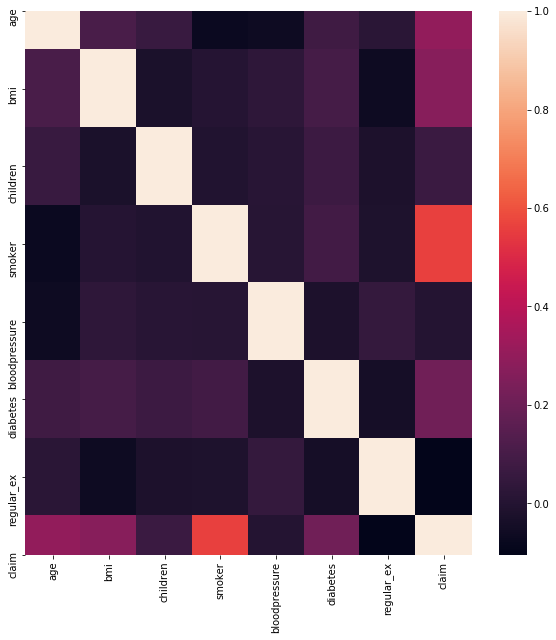

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.heatmap(df2.corr())

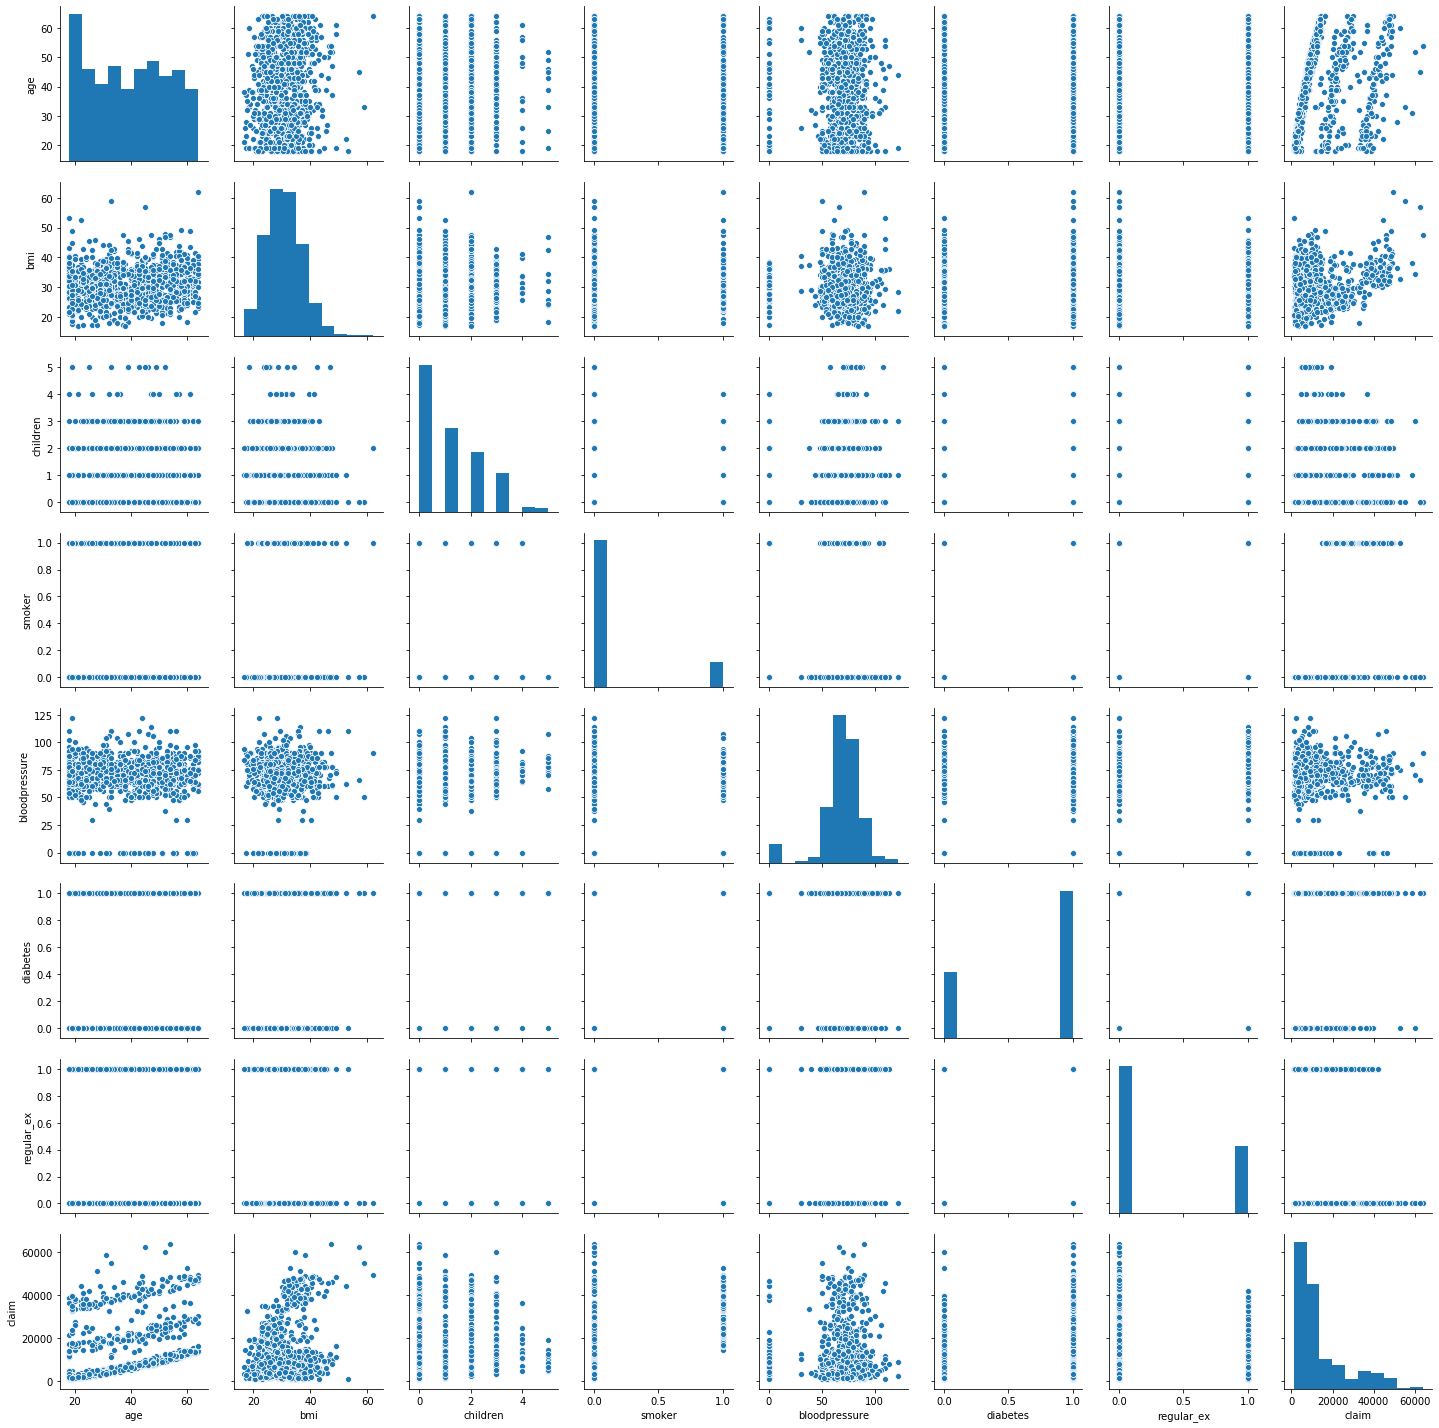

In [10]:
sns.pairplot(df2)

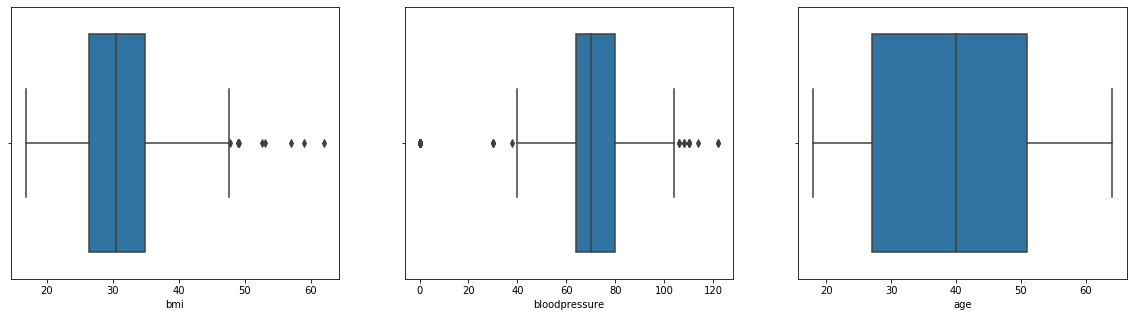

In [11]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.boxplot(df2['bmi'], ax=ax[0])
sns.boxplot(df2['bloodpressure'], ax=ax[1])
sns.boxplot(df2['age'], ax=ax[2])
plt.show()


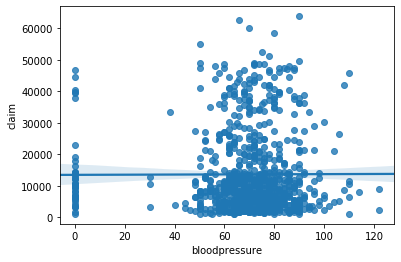

In [12]:
sns.regplot(df2['bloodpressure'],y=df2['claim'])

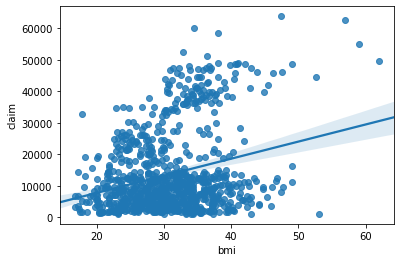

In [13]:
sns.regplot(df2['bmi'],y=df2['claim'])

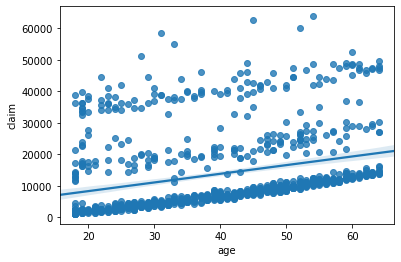

In [14]:
sns.regplot(df2['age'],y=df2['claim'])

In [15]:
dummies1=pd.get_dummies(df2['sex'])

In [16]:
dummies2=pd.get_dummies(df2['region'])

In [17]:
df2 = df2.join(dummies1)

In [18]:
df2 = df2.join(dummies2)

In [19]:
df2

,age,sex,bmi,children,smoker,region,bloodpressure,diabetes,regular_ex,claim,female,male,northeast,northwest,southeast,southwest
0,28,female,28.9,1,0,northeast,72,1,0,4337.74,1,0,1,0,0,0
1,49,female,21.3,1,0,southwest,94,0,0,9182.17,1,0,0,0,0,1
2,34,female,27.7,0,0,southeast,62,1,0,4415.16,1,0,0,0,1,0
3,57,female,20.1,1,0,southwest,72,0,1,12032.33,1,0,0,0,0,1
4,29,male,35.5,2,0,southwest,74,1,0,44585.46,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,30,male,25.5,0,0,northeast,60,1,0,3645.09,0,1,1,0,0,0
892,25,female,20.8,1,0,southwest,56,1,0,3208.79,1,0,0,0,0,1
893,19,male,35.5,0,0,northwest,74,0,0,1646.43,0,1,0,1,0,0
894,38,male,16.8,2,0,northeast,84,0,1,6640.54,0,1,1,0,0,0


In [20]:
df2=df2.drop('sex', axis=1)

In [21]:
df2=df2.drop('male', axis=1)

In [22]:
df2=df2.drop('region', axis=1)

In [23]:
df2

,age,bmi,children,smoker,bloodpressure,diabetes,regular_ex,claim,female,northeast,northwest,southeast,southwest
0,28,28.9,1,0,72,1,0,4337.74,1,1,0,0,0
1,49,21.3,1,0,94,0,0,9182.17,1,0,0,0,1
2,34,27.7,0,0,62,1,0,4415.16,1,0,0,1,0
3,57,20.1,1,0,72,0,1,12032.33,1,0,0,0,1
4,29,35.5,2,0,74,1,0,44585.46,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,30,25.5,0,0,60,1,0,3645.09,0,1,0,0,0
892,25,20.8,1,0,56,1,0,3208.79,1,0,0,0,1
893,19,35.5,0,0,74,0,0,1646.43,0,0,1,0,0
894,38,16.8,2,0,84,0,1,6640.54,0,1,0,0,0


In [55]:
df2.mean()

age                 39.351562
bmi                 30.874754
children             1.062500
smoker               0.143973
bloodpressure       68.896205
diabetes             0.690848
regular_ex           0.314732
claim            13651.240871
female               0.507812
northeast            0.255580
northwest            0.224330
southeast            0.274554
southwest            0.245536
dtype: float64

In [24]:
dummies1=pd.get_dummies(df1['sex'])

In [25]:
dummies2=pd.get_dummies(df1['region'])

In [26]:
df1 = df1.join(dummies1)

In [27]:
df1 = df1.join(dummies2)

In [28]:
df1

,age,sex,bmi,children,smoker,region,bloodpressure,diabetes,regular_ex,female,male,northeast,northwest,southeast,southwest
0,45,male,28.7,2,0,southwest,72,1,0,0,1,0,0,0,1
1,37,female,30.8,2,0,southeast,110,0,1,1,0,0,0,1,0
2,41,male,28.8,1,0,southwest,72,1,1,0,1,0,0,0,1
3,22,male,26.8,0,0,southeast,44,1,0,0,1,0,0,1,0
4,55,male,33.0,0,0,southeast,60,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,52,male,30.2,1,0,southwest,68,0,0,0,1,0,0,0,1
438,54,male,24.0,0,0,northeast,76,1,1,0,1,1,0,0,0
439,45,female,28.6,2,0,southeast,62,0,1,1,0,0,0,1,0
440,32,female,24.6,0,1,southwest,82,1,0,1,0,0,0,0,1


In [29]:
df1=df1.drop('sex', axis=1)

In [30]:
df1=df1.drop('male', axis=1)

In [31]:
df1=df1.drop('region', axis=1)

In [32]:
df1

,age,bmi,children,smoker,bloodpressure,diabetes,regular_ex,female,northeast,northwest,southeast,southwest
0,45,28.7,2,0,72,1,0,0,0,0,0,1
1,37,30.8,2,0,110,0,1,1,0,0,1,0
2,41,28.8,1,0,72,1,1,0,0,0,0,1
3,22,26.8,0,0,44,1,0,0,0,0,1,0
4,55,33.0,0,0,60,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
437,52,30.2,1,0,68,0,0,0,0,0,0,1
438,54,24.0,0,0,76,1,1,0,1,0,0,0
439,45,28.6,2,0,62,0,1,1,0,0,1,0
440,32,24.6,0,1,82,1,0,1,0,0,0,1


In [46]:
x_train=df2.drop(['claim','female','bloodpressure'], axis=1)
y_train=df2['claim']
x_test=df1.drop(['female','bloodpressure'], axis=1)
y_test=[]

In [47]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

x_constant = sm.add_constant(x_train)
lin_reg = sm.OLS(y_train,x_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     103.5
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          9.52e-132
Time:                        13:15:57   Log-Likelihood:                -9417.2
No. Observations:                 896   AIC:                         1.885e+04
Df Residuals:                     886   BIC:                         1.890e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.302e+04   1389.357     -9.371      0.000   -1.57e+04   -1.03e+04
age          280.3237     21.780     12.871      0.000     237.577     323.070
bmi          452.5331     49.071      9.222      0.000     356.224     548.842
children     498.0317    254.608      1.956      0.051      -1.674     997.737
smoker      2.075e+04    855.904     24.243      0.000    1.91e+04    2.24e+04
diabetes    3067.4891    654.838      4.684      0.000    1782.275    4352.703
regular_ex -2228.5924    645.238     -3.454      0.001   -3494.965    -962.220
northeast  -2656.4436    589.562     -4.506      0.000   -3813.545   -1499.342
northwest  -2835.6576    622.460     -4.556      0.000   -4057.326   -1613.990
southeast  -3573.1225    679.944     -5.255      0.000   -4907.612   -2238.633
southwest  -3953.9884    621.603     -6.361      0.000   -5173.975   -2734.001
==============================================================================
Omnibus:                      352.339   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1238.624
Skew:                           1.918   Prob(JB):                    1.09e-269
Kurtosis:                       7.298   Cond. No.                     5.00e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.51e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(x_train, y_train)}')
y_predicted = lin_reg.predict(x_test)


Coefficients: [  280.32373767   452.53306409   498.03169445 20749.88817617
  3067.48906449 -2228.5923859    598.35939545   419.14542238
  -318.31945409  -699.18536374]
Intercept: -16274.015140660851
R^2 score: 0.512464132452944


In [49]:
y_predicted = lin_reg.predict(x_test)


In [51]:
y_actual= df2['claim'].head(442)

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_actual, y_predicted))
rms

15627.477853484701

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x_train.columns).T

,age,bmi,children,smoker,diabetes,regular_ex,northeast,northwest,southeast,southwest
vif,1.028299,1.099042,1.013711,1.014857,1.029455,1.009315,inf,inf,inf,inf


In [83]:
lasso=Lasso(fit_intercept=True,random_state=0)

In [84]:
lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [70]:
lasso.score(x_train,y_train)

0.5124639257543204

In [72]:
predictions=lasso.predict(x_test)

In [75]:
np.sqrt(metrics.mean_squared_error(y_actual,predictions))
# RMSE

15625.770273132557

In [76]:
ridge=Ridge(fit_intercept=True,random_state=0)

In [77]:
ridge.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

In [78]:
ridge.score(x_train,y_train)

0.512437409362219

In [90]:
predictions3=ridge.predict(x_test)

In [91]:
np.sqrt(metrics.mean_squared_error(y_actual,predictions))
# RMSE

15596.427647744538

In [97]:
prediction = pd.DataFrame(predictions3, columns=['predictions']).to_csv('submission.csv')


In [99]:
pd.read_csv('submission.csv')

,Unnamed: 0,predictions
0,0,12714.006873
1,1,6523.575554
2,2,8922.417768
3,3,4802.030612
4,4,16847.767906
...,...,...
437,437,11790.033047
438,438,11185.779617
439,439,7767.624096
440,440,26786.126832


In [102]:
rfr=RandomForestRegressor()

In [103]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [114]:
rfr.score(x_train,y_train)

0.9022263974205921

In [106]:
rfr.feature_importances_

array([0.24030743, 0.28853951, 0.05874812, 0.31679398, 0.01622253,
       0.02799125, 0.01721003, 0.01642434, 0.00883521, 0.0089276 ])

In [125]:
predictions4 =rfr.predict(x_test)

In [126]:
np.sqrt(metrics.mean_squared_error(y_actual,predictions))
# RMSE

16368.497855444273

In [127]:
prediction = pd.DataFrame(predictions4, columns=['predictions']).to_csv('submission.csv')
